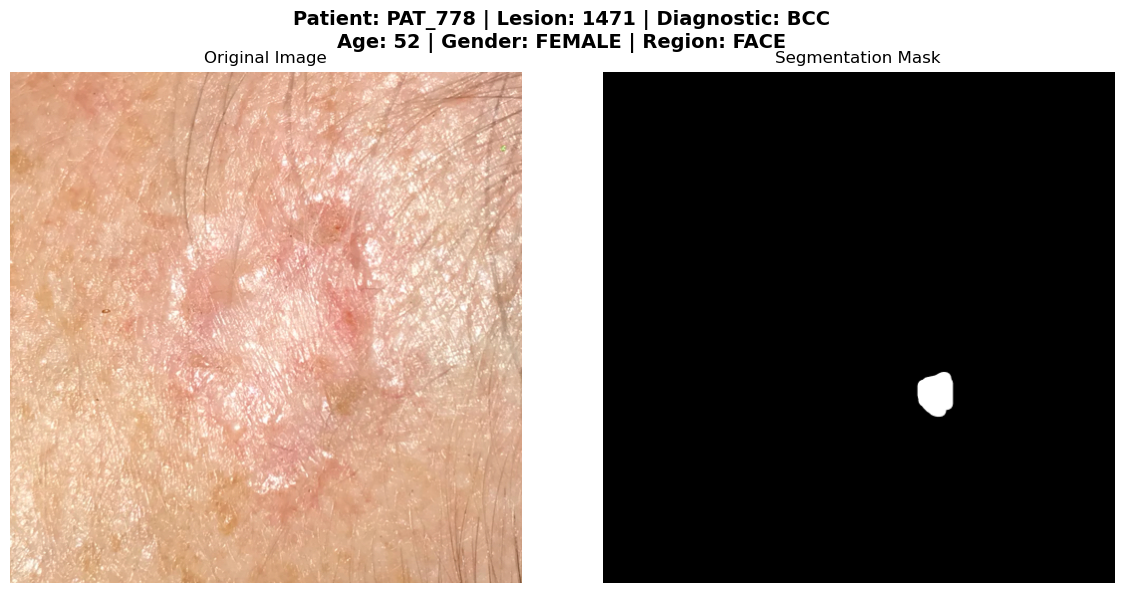

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path

#Define paths to data and the group ID to get the data for
PATH_RAW = Path("./data")
PATH_PROCESSED = Path("./data/group_data")
PATH_IMGS = PATH_PROCESSED/"imgs/"
PATH_MASKS = PATH_PROCESSED/"masks/"

#choose patient
patient_id = 'PAT_778'
lesion_id = 1471

#filter from metadata
df_metadata = pd.read_csv(f"./data/group_data/metadata.csv")

sample = df_metadata[(df_metadata['patient_id'] == patient_id) & 
                     (df_metadata['lesion_id'] == lesion_id)]

#check
if len(sample) == 0:
    print(f"No sample found for patient_id={patient_id} and lesion_id={lesion_id}")
else:
    #get the image filename
    img_filename = sample['img_id'].values[0]
    
    #load image and mask
    img_path = PATH_IMGS / img_filename
    mask_path = PATH_MASKS / img_filename.replace('.png', '_mask.png')
    
    #read image and mask with plt
    img = plt.imread(img_path)
    mask = plt.imread(mask_path)
    
    #patient information for title
    diagnostic = sample['diagnostic'].values[0]
    age = sample['age'].values[0]
    gender = sample['gender'].values[0]
    region = sample['region'].values[0]
    
    #display side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    #display image
    axes[0].imshow(img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    #display mask
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Segmentation Mask')
    axes[1].axis('off')
    
    #add overall title for the figure
    fig.suptitle(f'Patient: {patient_id} | Lesion: {lesion_id} | Diagnostic: {diagnostic}\n'
                 f'Age: {age} | Gender: {gender} | Region: {region}', 
                 fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
